In [780]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: .DS_Store
  File: test.csv
  File: data_analytics.ipynb
  File: sub4.csv
  File: sub5.csv
  File: sub7.csv
  File: .gitignore
  File: sub6.csv
  File: sub2.csv
  File: sub3.csv
  File: sub1.csv
  File: Readme1.md
  File: predictions.ipynb
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./.git
  File: ORIG_HEAD
  File: config
  File: HEAD
  File: description
  File: index
  File: COMMIT_EDITMSG
  File: FETCH_HEAD
Directory: ./.git/objects
Directory: ./.git/objects/50
  File: be1c9b98460d33038ec63cdd7cc37ddbed78e8
Directory: ./.git/objects/9b
  File: da359a00da91ad5d9bca006d284da28f2f09e3
Directory: ./.git/objects/9e
  File: 18ff6b96f08ab6b477b26aa59535aacddea30c
Directory: ./.git/objects/69
  File: 3fed9e3038e83d785513466c9c8e310b6b949c
Directory: ./.git/objects/67
  File: 6

In [781]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')


X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

print(X_test_estimated_a.shape)

X_test_estimated_a


(2880, 47)


,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.1,1.207,2090.600098,0.0,0.0,1629.400024,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.299988,0.0,0.0,980.799988,986.700012,0.0,0.0,82.199997,992.599976,NaN,0.0,0.0,-0.0,0.0,351.855988,-3.282,0.1,285.399994,99.400002,39931.601562,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.0,0.0,1537.300049,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500000,992.700012,NaN,0.0,0.0,-0.0,0.0,355.317993,-3.469,0.1,285.299988,100.000000,39574.300781,2.0,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.1,1.208,2015.699951,0.0,0.0,1471.400024,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,981.000000,986.900024,0.0,0.0,82.800003,992.799988,NaN,0.0,0.0,-0.0,0.0,358.785004,-3.556,0.1,285.299988,100.000000,39627.199219,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.208,2015.599976,0.0,0.0,1405.500000,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,981.000000,986.900024,0.0,0.0,83.199997,992.900024,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.541,0.1,285.200012,100.000000,39691.800781,2.0,1.6,-1.1,0.0


### Counting NULL values 

In [782]:

# Counting NULL values in location a

null_count_estimated_a = X_train_estimated_a.isnull().sum()
null_count_observed_a = X_train_observed_a.isnull().sum()
null_count_estimated_test_a = X_test_estimated_a.isnull().sum()

# Counting NULL values in location b

null_count_estimated_b = X_train_estimated_b.isnull().sum()
null_count_observed_b = X_train_observed_b.isnull().sum()
null_count_estimated_test_b = X_test_estimated_b.isnull().sum()

# Counting NULL values in location c

null_count_estimated_c = X_train_estimated_c.isnull().sum()
null_count_observed_c = X_train_observed_c.isnull().sum()
null_count_estimated_test_c = X_test_estimated_c.isnull().sum()


## dropping null columns 
print(X_train_estimated_a.shape)
X_train_estimated_a = X_train_estimated_a.dropna(axis=1)
print(X_train_estimated_a.shape)

print("Null values in A: ")
print("Count estimate train ----> " , )
for item in null_count_estimated_a.to_dict(): 
    if null_count_estimated_a.to_dict()[item] != 0: 
        print(item, null_count_estimated_a.to_dict()[item])

print("--------------------------------------------------------------------------------")

print("Count observed train ----> " )
for item in null_count_observed_a.to_dict(): 
    if null_count_observed_a.to_dict()[item] != 0: 
        print(item, null_count_observed_a.to_dict()[item])


print("--------------------------------------------------------------------------------")

print("Count estimate test ----> "  )
for item in null_count_estimated_test_a.to_dict(): 
    if null_count_estimated_test_a.to_dict()[item] != 0: 
        print(item, null_count_estimated_test_a.to_dict()[item])

print("--------------------------------------------------------------------------------")
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
print("")
print("Null values in B: ")
print("Count estimate train ----> " , )
for item in null_count_estimated_b.to_dict(): 
    if null_count_estimated_b.to_dict()[item] != 0: 
        print(item, null_count_estimated_b.to_dict()[item])

print("--------------------------------------------------------------------------------")

print("Count observed train ----> " )
for item in null_count_observed_b.to_dict(): 
    if null_count_observed_b.to_dict()[item] != 0: 
        print(item, null_count_observed_b.to_dict()[item])


print("--------------------------------------------------------------------------------")

print("Count estimate test ----> "  )
for item in null_count_estimated_test_b.to_dict(): 
    if null_count_estimated_test_b.to_dict()[item] != 0: 
        print(item, null_count_estimated_test_b.to_dict()[item])

print("--------------------------------------------------------------------------------")




(17576, 47)
(17576, 44)
Null values in A: 
Count estimate train ----> 
ceiling_height_agl:m 3919
cloud_base_agl:m 2094
snow_density:kgm3 15769
--------------------------------------------------------------------------------
Count observed train ----> 
ceiling_height_agl:m 22247
cloud_base_agl:m 8066
snow_density:kgm3 115945
--------------------------------------------------------------------------------
Count estimate test ----> 
ceiling_height_agl:m 793
cloud_base_agl:m 298
snow_density:kgm3 2880
--------------------------------------------------------------------------------
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Null values in B: 
Count estimate train ----> 
ceiling_height_agl:m 3689
cloud_base_agl:m 1963
snow_density:kgm3 15713
--------------------------------------------------------------------------------
Count observed train ----> 
ceiling_height_agl:m 18772
cloud_base_agl:m 7473
snow_density:kgm3 111201
----------------------

### Looking at data Head and Tail 

Datasets "_estimated_" and "_observed_" are sampled every 15 minutes, whilst "_test_" are sampled at hourly intervals. 

Therefore, we average the observations each hour to sample at the same intervals as the estimations.

- in the test dataset, we are given 30 days scattered between 05/01 untill 07/03. Using reshape fills in the missing dates so we have to remove the added dates from our test set. 



In [796]:


#X_train_estimated_a.head() # 15 min 
#X_test_estimated_a.head() # 15 min
#X_train_observed_a.head() # 15 min 
#train_a.head() # hourly 

### fixing a

# averaging so we only have every hour / however this adds dates missing, we have 30 days scattered, this gives us all 64 days between 05-01 to 07-03
X_train_observed_a_hourly = X_train_observed_a.resample("H", on="date_forecast").mean()
X_train_estimated_a_hourly = X_train_estimated_a.resample("H", on="date_forecast").mean()
X_test_estimated_a_hourly = X_test_estimated_a.resample("H", on="date_forecast").mean()

## to fix this we store all the unique dates from the original set to compare later 
dat_list_train_observed = X_train_observed_a["date_forecast"].dt.date.unique().tolist()
dat_list_train_estimated = X_train_estimated_a["date_forecast"].dt.date.unique().tolist()
dat_list_test_estimated = X_test_estimated_a["date_forecast"].dt.date.unique().tolist()

## we need the date forecast back as feature, as the resample changes the index for some reason
X_train_observed_a_hourly["date_forecast"] = X_train_observed_a_hourly.index
X_train_estimated_a_hourly["date_forecast"] = X_train_estimated_a_hourly.index
X_test_estimated_a_hourly["date_forecast"] = X_test_estimated_a_hourly.index

## returns only the correct dates! 
X_train_observed_a_corr = X_train_observed_a_hourly[X_train_observed_a_hourly["date_forecast"].dt.date.isin(dat_list_train_observed)]
X_train_estimated_a_corr = X_train_estimated_a_hourly[X_train_estimated_a_hourly["date_forecast"].dt.date.isin(dat_list_train_estimated)]
X_test_estimated_a_corr = X_test_estimated_a_hourly[X_test_estimated_a_hourly["date_forecast"].dt.date.isin(dat_list_test_estimated)]


# ## fixing b

X_train_observed_b_hourly = X_train_observed_b.resample("H", on="date_forecast").mean()
X_train_estimated_b_hourly = X_train_estimated_b.resample("H", on="date_forecast").mean()
X_test_estimated_b_hourly = X_test_estimated_b.resample("H", on="date_forecast").mean()

dat_list_train_observed = X_train_observed_b["date_forecast"].dt.date.unique().tolist()
dat_list_train_estimated = X_train_estimated_b["date_forecast"].dt.date.unique().tolist()
dat_list_test_estimated = X_test_estimated_b["date_forecast"].dt.date.unique().tolist()

X_train_observed_b_hourly["date_forecast"] = X_train_observed_b_hourly.index
X_train_estimated_b_hourly["date_forecast"] = X_train_estimated_b_hourly.index
X_test_estimated_b_hourly["date_forecast"] = X_test_estimated_b_hourly.index

X_train_observed_b_corr = X_train_observed_b_hourly[X_train_observed_b_hourly["date_forecast"].dt.date.isin(dat_list_train_observed)]
X_train_estimated_b_corr = X_train_estimated_b_hourly[X_train_estimated_b_hourly["date_forecast"].dt.date.isin(dat_list_train_estimated)]
X_test_estimated_b_corr = X_test_estimated_b_hourly[X_test_estimated_b_hourly["date_forecast"].dt.date.isin(dat_list_test_estimated)]

# ## fixing c

X_train_observed_c_hourly = X_train_observed_c.resample("H", on="date_forecast").mean()
X_train_estimated_c_hourly = X_train_estimated_c.resample("H", on="date_forecast").mean()
X_test_estimated_c_hourly = X_test_estimated_c.resample("H", on="date_forecast").mean()

dat_list_train_observed = X_train_observed_c["date_forecast"].dt.date.unique().tolist()
dat_list_train_estimated = X_train_estimated_c["date_forecast"].dt.date.unique().tolist()
dat_list_test_estimated = X_test_estimated_c["date_forecast"].dt.date.unique().tolist()

X_train_observed_c_hourly["date_forecast"] = X_train_observed_c_hourly.index
X_train_estimated_c_hourly["date_forecast"] = X_train_estimated_c_hourly.index
X_test_estimated_c_hourly["date_forecast"] = X_test_estimated_c_hourly.index

X_train_observed_c_corr = X_train_observed_c_hourly[X_train_observed_c_hourly["date_forecast"].dt.date.isin(dat_list_train_observed)]
X_train_estimated_c_corr = X_train_estimated_c_hourly[X_train_estimated_c_hourly["date_forecast"].dt.date.isin(dat_list_train_estimated)]
X_test_estimated_c_corr = X_test_estimated_c_hourly[X_test_estimated_c_hourly["date_forecast"].dt.date.isin(dat_list_test_estimated)]

# storing data for use in other notebooks
%store X_test_estimated_a_corr
%store X_test_estimated_b_corr
%store X_test_estimated_c_corr


Stored 'X_test_estimated_a_corr' (DataFrame)
Stored 'X_test_estimated_b_corr' (DataFrame)
Stored 'X_test_estimated_c_corr' (DataFrame)


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_1754/1537654057.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train_estimated_a_hourly = X_train_estimated_a.resample("H", on="date_forecast").mean()
/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_1754/1537654057.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_test_estimated_a_hourly = X_test_estimated_a.resample("H", on="date_forecast").mean()
/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_1754/1537654057.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a futu

### Feature Importance

Graphing the importance of different features according to some common regressor algorithms 

Noticed that "direct rad" features dominated, removing these gave more insight into the other feature. 

## Dataset A


In [784]:
train_a.columns = ["date_forecast", "pv_measurement"]
train_a.set_index("date_forecast", inplace=True)


In [801]:
%store -r data_A
%store -r data_B
%store -r data_C

data_A = data_A
data_B = data_B
data_C = data_C

%store -r X_test_estimated_a_corr 
%store -r X_test_estimated_b_corr 
%store -r X_test_estimated_c_corr

X_test_estimated_a_corr = X_test_estimated_a_corr 
X_test_estimated_b_corr = X_test_estimated_b_corr
X_test_estimated_c_corr = X_test_estimated_c_corr

In [785]:
## Testing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

train_data_A = pd.concat([X_train_observed_a_corr, X_train_estimated_a_corr], join="outer", ignore_index=True) 

data_A = pd.merge(train_a, train_data_A, how="left", on="date_forecast") 
dates = data_A["date_forecast"]
cols = data_A.columns.delete(0)
data_A_wo_date = data_A[cols]

imp = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=False)
imp.fit(data_A_wo_date)


SimpleImputer()

In [786]:
data_A_wo_date = imp.transform(data_A_wo_date)

data_A_wo_date = pd.DataFrame(data_A_wo_date)

data_A = data_A_wo_date

data_A.columns = data_A.columns.astype(str)

data_A.columns = cols

data_A["date_forecast"] = dates
cols = cols.tolist()
cols.insert(0, "date_forecast")

data_A = data_A[cols]

data_A

,date_forecast,pv_measurement,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,0.00,7.700,1.22825,1728.949951,0.000000,0.000,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,250.0,0.0,0.0,0.0,0.175,348.036743,-3.77425,0.000,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
1,2019-06-02 23:00:00,0.00,7.700,1.22350,1689.824951,0.000000,0.000,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,250.0,0.0,0.0,0.0,0.200,91.980751,-4.35725,0.000,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2,2019-06-03 00:00:00,0.00,7.875,1.21975,1563.224976,0.000000,0.000,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,250.0,0.0,0.0,0.0,0.400,14.934750,-3.30950,0.000,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
3,2019-06-03 01:00:00,0.00,8.425,1.21800,1283.425049,208.649994,0.750,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,250.0,0.0,0.0,0.0,0.550,28.630251,-0.82250,0.000,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
4,2019-06-03 02:00:00,19.36,8.950,1.21800,1003.500000,32468.150391,23.100,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,250.0,0.0,0.0,0.0,0.250,41.997501,3.05125,0.000,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,2023-04-30 19:00:00,9.02,4.550,1.27650,2931.676806,84464.945312,4.225,1749.091210,0.0,272.424988,2.825,56431.050781,0.10,13230.649414,96.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.574951,1007.799988,0.0,0.000,74.625000,1014.049988,250.0,0.0,0.0,0.0,0.000,304.939240,-0.18050,0.000,275.024994,96.699997,23417.074219,5.175,4.800,1.925,0.0
34081,2023-04-30 20:00:00,0.00,4.500,1.27975,2931.676806,2270.875000,0.000,1749.091210,0.0,272.299988,0.000,5067.875000,0.00,176.350006,94.224998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.700012,0.0,0.0,1001.549988,1007.799988,0.0,0.000,76.875000,1014.049988,250.0,0.0,0.0,0.0,0.000,318.625763,-5.17600,0.000,274.650024,94.525002,21084.050781,4.650,4.025,2.300,0.0
34082,2023-04-30 21:00:00,0.00,4.500,1.28100,2931.676806,0.000000,0.000,1749.091210,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.549988,0.0,0.0,1001.400024,1007.674988,0.0,0.000,77.775002,1013.925049,250.0,0.0,0.0,0.0,0.000,332.785736,-8.95075,0.000,274.524994,95.675003,20792.500000,4.450,3.575,2.600,0.0
34083,2023-04-30 22:00:00,0.00,4.500,1.28100,2931.676806,0.000000,0.000,1749.091210,0.0,272.299988,0.000,0.000000,0.00,0.000000,97.775002,6

In [787]:


%store data_A


Stored 'data_A' (DataFrame)


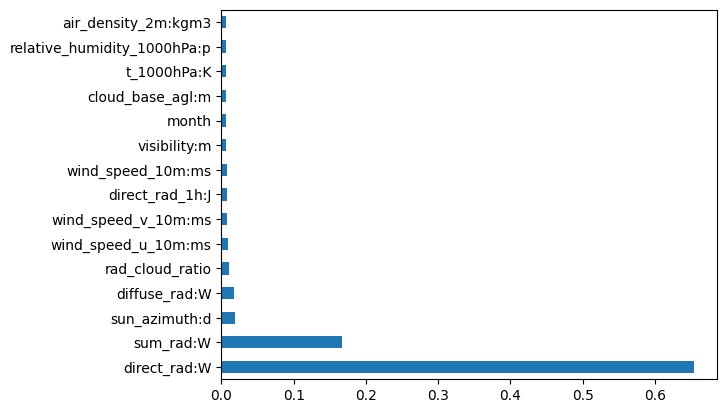

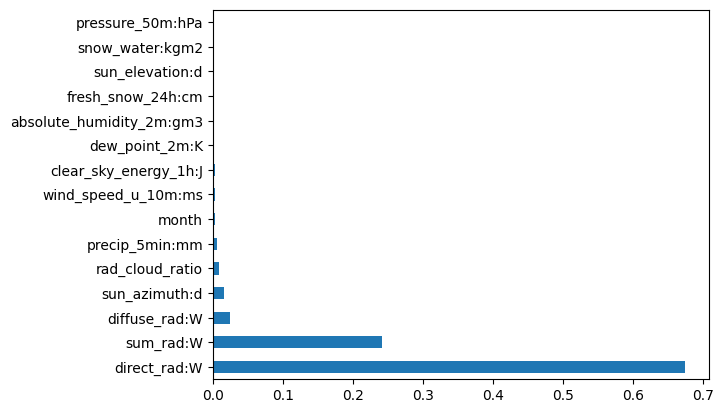

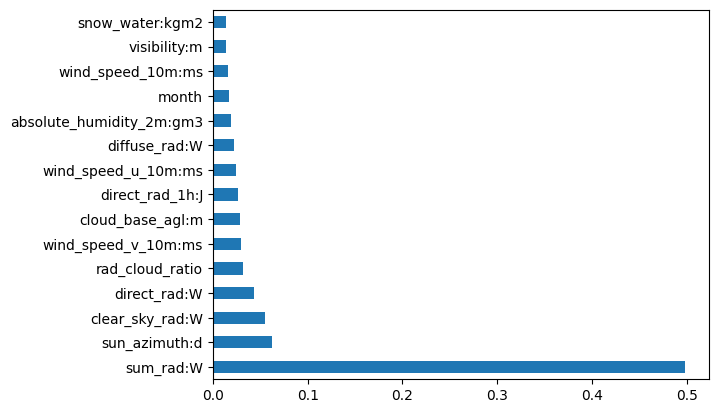

In [802]:

X = data_A.iloc[:,2:-1]  #independent columns
y = data_A.iloc[:,1]    #target column i.e 


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

model = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = AdaBoostRegressor()
model.fit(X,y)
model2.fit(X, y)
model3.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(15).plot(kind='barh')
plt.show()

feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(15).plot(kind='barh')
plt.show()


## Dataset B


In [788]:
train_b.columns = ["date_forecast", "pv_measurement"]
train_b.set_index("date_forecast", inplace=True)


In [789]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

train_data_B = pd.concat([X_train_observed_b_corr, X_train_estimated_b_corr], join="outer", ignore_index=True) 

data_B = pd.merge(train_a, train_data_B, how="left", on="date_forecast") 
dates = data_B["date_forecast"]
cols = data_B.columns.delete(0)
data_B_wo_date = data_B[cols]

imp = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=False)
imp.fit(data_B_wo_date)

SimpleImputer()

In [790]:
data_B_wo_date = imp.transform(data_B_wo_date)

data_B_wo_date = pd.DataFrame(data_B_wo_date)

data_B = data_B_wo_date

data_B.columns = data_B.columns.astype(str)

data_B.columns = cols

data_B["date_forecast"] = dates
cols = cols.tolist()
cols.insert(0, "date_forecast")

data_B = data_B[cols]

data_B

,date_forecast,pv_measurement,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,0.00,7.700,1.22750,1729.750000,0.000000,0.000,1729.750000,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,7.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.349976,0.0,0.0,993.650024,999.650024,0.0,0.000,71.649994,1005.674988,250.0,0.0,0.0,0.0,0.175,348.037506,-3.773750,0.000,286.225006,100.000000,40760.925781,3.600,-3.575,-0.500,0.0
1,2019-06-02 23:00:00,0.00,7.700,1.22250,1690.625000,0.000000,0.000,1690.625000,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,7.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.224976,0.0,0.0,992.550049,998.550049,0.0,0.025,68.000000,1004.550049,250.0,0.0,0.0,0.0,0.200,91.981255,-4.357000,0.000,286.875000,100.000000,34152.925781,3.375,-3.350,0.275,0.0
2,2019-06-03 00:00:00,0.00,7.850,1.21900,1564.025024,0.000000,0.000,1564.025024,0.0,280.625000,0.000,0.000000,0.00,0.000000,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.549988,0.0,0.0,991.900024,997.849976,0.0,0.100,67.949997,1003.825012,250.0,0.0,0.0,0.0,0.400,14.935750,-3.309000,0.000,286.950012,100.000000,13785.424805,3.050,-2.950,0.750,0.0
3,2019-06-03 01:00:00,0.00,8.425,1.21800,1284.300049,208.875000,0.750,1284.300049,0.0,281.674988,0.300,527.099976,0.00,0.000000,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.400024,997.349976,0.0,0.125,73.875000,1003.325012,250.0,0.0,0.0,0.0,0.550,28.631250,-0.822250,0.000,286.725006,100.000000,2327.149902,2.750,-2.600,0.875,0.0
4,2019-06-03 02:00:00,19.36,8.950,1.21825,1004.450012,32477.498047,23.100,1004.450012,0.0,282.500000,11.975,22077.675781,0.15,282.024994,84.875000,7.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.075012,0.0,0.0,990.449951,996.400024,0.0,0.100,79.900002,1002.400024,250.0,0.0,0.0,0.0,0.250,41.998253,3.051500,0.000,286.450012,99.224998,11548.950195,2.550,-2.375,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,2023-04-30 19:00:00,9.02,4.550,1.27650,1677.949951,84462.523438,4.225,542.849976,0.0,272.424988,2.825,56433.972656,0.10,13244.500000,96.724998,7.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.450012,1007.674988,0.0,0.000,74.625000,1013.950012,250.0,0.0,0.0,0.0,0.000,304.940247,-0.180500,0.000,275.024994,96.724998,23434.074219,5.175,4.800,1.925,0.0
34081,2023-04-30 20:00:00,0.00,4.500,1.27875,1766.500000,2270.774902,0.000,546.349976,0.0,272.299988,0.000,5067.024902,0.00,176.649994,94.224998,7.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.750000,0.0,0.0,1001.450012,1007.674988,0.0,0.000,76.849998,1013.950012,250.0,0.0,0.0,0.0,0.000,318.626251,-5.175750,0.000,274.650024,94.525002,21307.724609,4.650,4.025,2.300,0.0
34082,2023-04-30 21:00:00,0.00,4.500,1.27900,1698.925049,0.000000,0.000,548.049988,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,7.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.574951,0.0,0.0,1001.299988,1007.525024,0.0,0.000,77.775002,1013.799988,250.0,0.0,0.0,0.0,0.000,332.786255,-8.950750,0.000,274.524994,95.650002,21159.224609,4.450,3.600,2.600,0.0
34083,2023-04-30 22:00:00,0.00,4.500,1.27975,1354.824951,0.000000,0.000,527.599976,0.0,272.274994,0.000,0.000000,0.00,0.000000,97.7500

In [791]:

%store data_B

Stored 'data_B' (DataFrame)


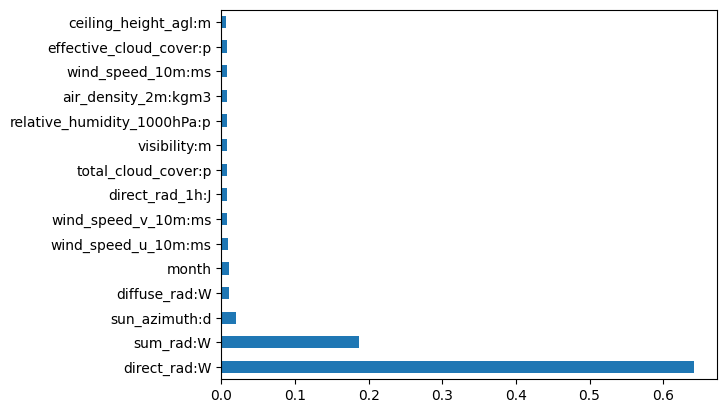

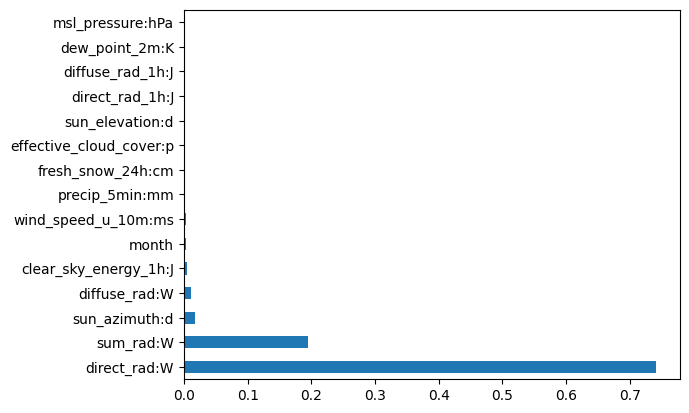

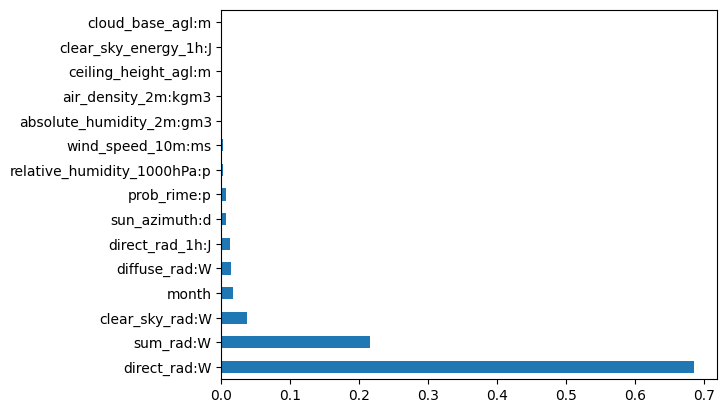

In [799]:

## With direct_rad features 
X = data_B.iloc[:,2:-1]  #independent columns
y = data_B.iloc[:,1]    #target column i.e price range


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

model = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = AdaBoostRegressor()
model.fit(X,y)
model2.fit(X, y)
model3.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(15).plot(kind='barh')
plt.show()

feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(15).plot(kind='barh')
plt.show()


## Dataset C


In [792]:
train_c.columns = ["date_forecast", "pv_measurement"]
train_c.set_index("date_forecast", inplace=True)

In [793]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

train_data_C = pd.concat([X_train_observed_c_corr, X_train_estimated_c_corr], join="outer", ignore_index=True) 

data_C = pd.merge(train_c, train_data_C, how="left", on="date_forecast") 
dates = data_C["date_forecast"]
cols = data_C.columns.delete(0)
data_C_wo_date = data_C[cols]

imp = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=False)
imp.fit(data_C_wo_date)

SimpleImputer()

In [794]:
data_C_wo_date = imp.transform(data_C_wo_date)

data_C_wo_date = pd.DataFrame(data_C_wo_date)

data_C = data_C_wo_date

data_C.columns = data_C.columns.astype(str)

data_C.columns = cols

data_C["date_forecast"] = dates
cols = cols.tolist()
cols.insert(0, "date_forecast")

data_C = data_C[cols]

data_C

(32155, 47)


,date_forecast,pv_measurement,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2018-12-31 23:00:00,77.63106,5.871566,1.255162,2689.859177,520870.189105,144.68341,1727.309690,-0.01613,274.810171,39.718678,142985.269249,50.724803,182610.666821,66.404665,24.0,0.195693,0.016303,0.387926,0.048862,0.097755,0.486298,0.593036,1009.671831,0.005559,0.083948,994.182825,1000.310992,2.217686,0.008855,73.453274,1006.466414,250.0,0.509998,0.000023,0.000642,0.089076,179.637598,-1.000099,0.060145,279.383995,73.049518,33351.654476,2.860487,0.680539,0.865894,0.000118
1,2019-01-01 00:00:00,77.63106,5.475000,1.240750,1130.025024,0.000000,0.00000,1130.025024,1.00000,274.975006,0.000000,0.000000,0.000000,0.000000,78.699997,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,986.949951,0.045000,0.750000,972.150024,978.174988,0.200000,0.000000,89.949997,984.250000,250.0,0.000000,0.000000,0.000000,0.050000,20.734001,-48.355999,0.000000,278.350006,83.824997,16509.250000,2.900000,1.125000,2.625000,0.000000
2,2019-01-01 01:00:00,77.63106,5.350000,1.240000,1066.674927,0.000000,0.00000,1066.674927,0.75000,274.649994,0.000000,0.000000,0.000000,0.000000,97.375000,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,986.174988,0.015000,0.250000,971.250000,977.299988,0.150000,0.000000,89.000000,983.375000,250.0,0.000000,0.000000,0.000000,0.100000,40.327751,-44.950500,0.000000,278.200012,99.074997,13277.525391,3.650000,1.425000,3.350000,0.000000
3,2019-01-01 02:00:00,77.63106,5.350000,1.239000,1002.349976,0.000000,0.00000,1002.349976,0.00000,274.649994,0.000000,0.000000,0.000000,0.000000,95.900002,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,985.974976,0.000000,0.000000,971.075012,977.099976,0.000000,0.000000,87.699997,983.174988,250.0,0.000000,0.000000,0.000000,0.100000,57.828251,-39.885750,0.100000,278.149994,97.650002,11213.525391,3.950000,1.900000,3.475000,0.000000
4,2019-01-01 03:00:00,77.63106,5.300000,1.240000,959.150024,0.000000,0.00000,959.150024,0.00000,274.475006,0.000000,0.000000,0.000000,0.000000,96.074997,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,986.299988,0.045000,0.750000,971.349976,977.450012,0.000000,0.000000,88.949997,983.549988,250.0,0.000000,0.000000,0.000000,0.075000,73.391998,-33.781502,0.200000,277.625000,96.625000,7082.125000,4.600000,3.025000,3.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32150,2023-04-30 19:00:00,50.96000,4.400000,1.275500,1456.574951,84010.148438,4.17500,551.224976,0.00000,272.024994,2.775000,54774.000000,0.000000,9934.575195,97.724998,24.0,0.000000,0.000000,0.300000,0.000000,0.000000,0.500000,1.000000,1014.900024,0.000000,0.000000,999.049988,1005.275024,0.000000,0.000000,74.800003,1011.525024,250.0,0.000000,0.000000,0.000000,0.000000,304.936493,-0.201500,0.000000,274.924988,97.724998,25028.000000,4.075000,3.600000,1.875000,0.000000
32151,2023-04-30 20:00:00,2.94000,4.400000,1.278500,1476.349976,2206.800049,0.00000,564.099976,0.00000,271.950012,0.000000,4984.049805,0.000000,0.000000,95.449997,24.0,0.000000,0.000000,0.300000,0.000000,0.000000,0.00

In [795]:

%store data_C

Stored 'data_C' (DataFrame)


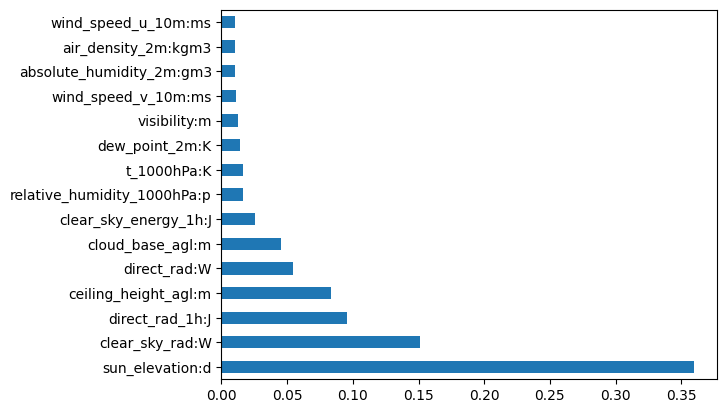

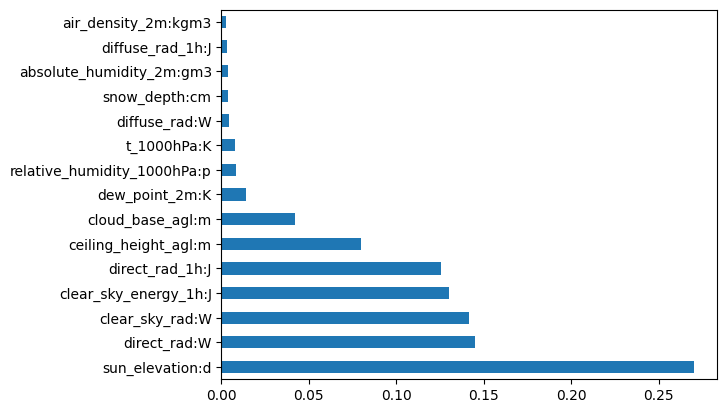

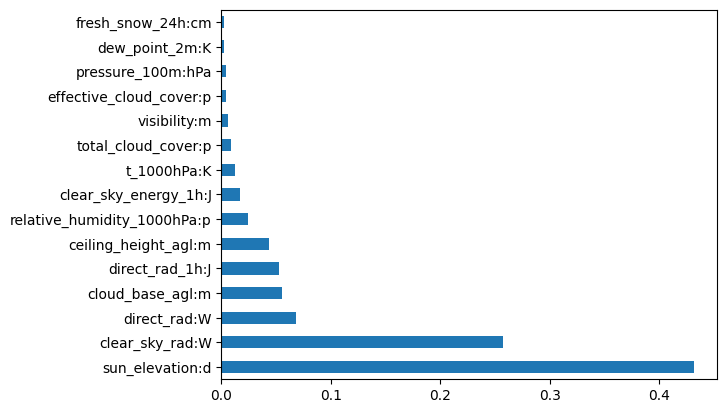

In [421]:

## With direct_rad features 
X = data_C.iloc[:,2:-1]  #independent columns
y = data_C.iloc[:,1]    #target column i.e price range


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

model = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = AdaBoostRegressor()
model.fit(X,y)
model2.fit(X, y)
model3.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(15).plot(kind='barh')
plt.show()

feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(15).plot(kind='barh')
plt.show()
